CNN Modeling is Done.
Training Done.
e_time:4804.77881860733[s]
<xarray.DataArray 'step' ()>
array(86)
Coordinates:
    step     int64 86
All Processes are Over


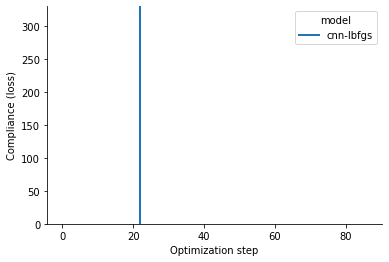

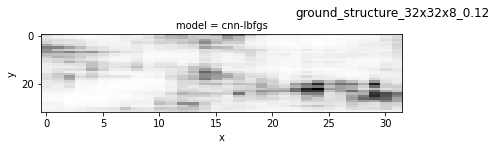

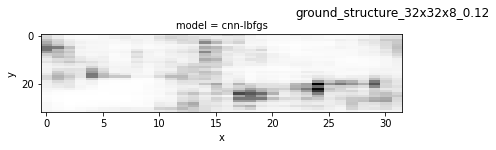

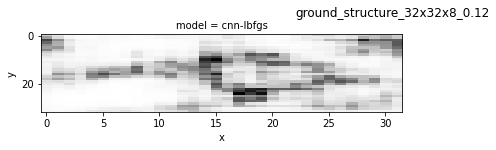

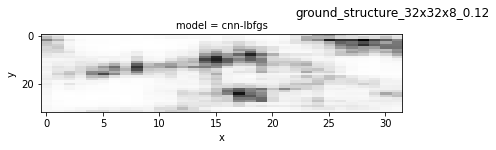

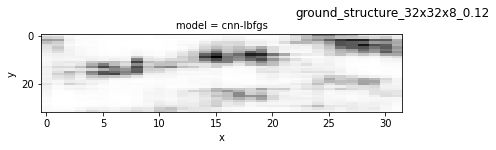

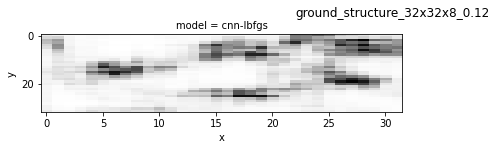

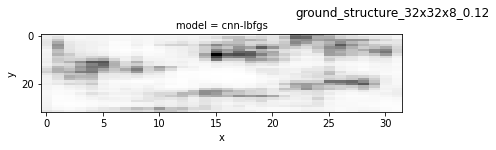

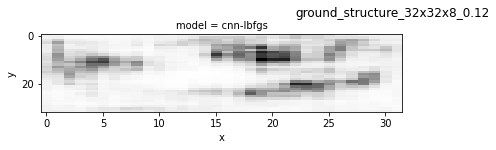

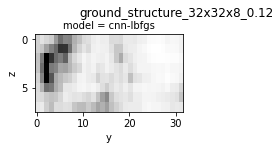

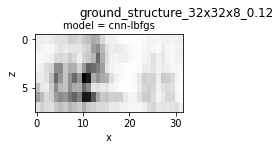

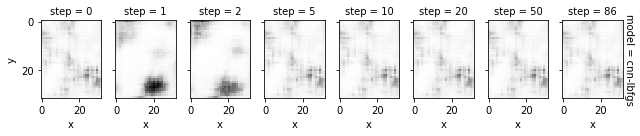

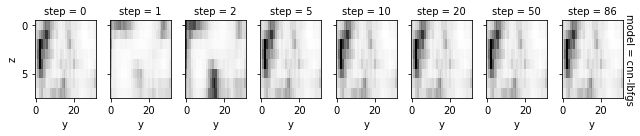

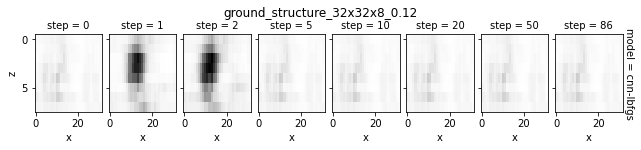

In [1]:
from IPython import display
from PIL import Image
import time
import seaborn
import matplotlib.pyplot as plt
import xarray
import pandas as pd
import numpy as np

from neural_structural_optimization import pipeline_utils
from neural_structural_optimization import problems
from neural_structural_optimization import models
from neural_structural_optimization import topo_api
from neural_structural_optimization import train

def train_all(problem, max_iterations, cnn_kwargs=None):
    args = topo_api.specified_task(problem)
    if cnn_kwargs is None:
        cnn_kwargs = {}

    model = models.CNNModel(args=args, **cnn_kwargs)
    print("CNN Modeling is Done.")
    ds_cnn = train.train_lbfgs(model, max_iterations)
    print("Training Done.")
    dims = pd.Index(['cnn-lbfgs'], name='model')
    return xarray.concat([ds_cnn], dim=dims)


problem = problems.PROBLEMS_BY_NAME['ground_structure_32x32x8_0.12']
max_iterations = 100

#%time ds = train_all(problem, max_iterations) #%timeが機能しないため,以下の処理に変更
start = time.time()
ds = train_all(problem, max_iterations)
e_time = time.time() - start
print ("e_time:{0}".format(e_time) + "[s]")

#Analysis Information
max_step = max(ds.design['step'])
print(max_step)

#Steps - Compliance
ds.loss.transpose().to_pandas().cummin().loc[:200].plot(linewidth=2)
plt.ylim(0, 330)
plt.ylabel('Compliance (loss)')
plt.xlabel('Optimization step')
seaborn.despine()

#Three-sided view
design_xy0 = ds.design.sel(z=ds.design.z[0])
design_xy1 = ds.design.sel(z=ds.design.z[1])
design_xy2 = ds.design.sel(z=ds.design.z[2])
design_xy3 = ds.design.sel(z=ds.design.z[3])
design_xy4 = ds.design.sel(z=ds.design.z[4])
design_xy5 = ds.design.sel(z=ds.design.z[5])
design_xy6 = ds.design.sel(z=ds.design.z[6])
design_xy7 = ds.design.sel(z=ds.design.z[7])
#design_xy8 = ds.design.sel(z=ds.design.z[8])
design_yz = ds.design.sel(x=ds.design.x[0])
design_zx = ds.design.sel(y=ds.design.y[-1])

design_xy0.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

design_xy1.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

design_xy2.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

design_xy3.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

design_xy4.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

design_xy5.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

design_xy6.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

design_xy7.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)
"""
design_xy8.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='y', size=2, aspect=2.5, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)
"""
design_yz.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='y', y='z', size=2, aspect=1, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

design_zx.ffill('step').sel(step=max(ds.design.step)).plot.imshow(
    col='model', x='x', y='z', size=2, aspect=1, col_wrap=2,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.suptitle(problem.name, y=1.02)

#Steps - Models
design_xy0.sel(step=[0, 1, 2, 5, 10, 20, 50, max(ds.design['step'])]).plot.imshow(
    row='model', col='step', x='x', y='y', size=2, aspect=0.5,
    yincrease=False, add_colorbar=False, cmap='Greys')
design_yz.sel(step=[0, 1, 2, 5, 10, 20, 50, max(ds.design['step'])]).plot.imshow(
    row='model', col='step', x='y', y='z', size=2, aspect=0.5,
    yincrease=False, add_colorbar=False, cmap='Greys')
design_zx.sel(step=[0, 1, 2, 5, 10, 20, 50, max(ds.design['step'])]).plot.imshow(
    row='model', col='step', x='x', y='z', size=2, aspect=0.5,
    yincrease=False, add_colorbar=False, cmap='Greys')
plt.subplots_adjust(wspace=0.1, hspace=0.05)
plt.suptitle(problem.name, y=1.02)

print("All Processes are Over")